In [47]:
import os
from glob import glob
import pandas as pd
from functools import reduce
from xml.etree import ElementTree as et

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
folder_path = '/content/drive/My Drive/data_preparation/data_images'

# Lista alla filer i mappen
file_list = os.listdir(folder_path)

# Skriv ut filerna
print(file_list)

['000296.xml', '000298.xml', '000302.xml', '000294.xml', '000289.xml', '000296.jpg', '000289.jpg', '000263.xml', '000259.jpg', '000263.jpg', '000266.jpg', '000275.xml', '000268.xml', '000266.xml', '000268.jpg', '000269.jpg', '000270.jpg', '000269.xml', '000270.xml', '000275.jpg', '000276.jpg', '000276.xml', '000282.jpg', '000278.jpg', '000285.xml', '000282.xml', '000278.xml', '000288.xml', '000285.jpg', '000288.jpg', '000257.jpg', '000262.jpg', '000020.jpg', '000020.xml', '000021.jpg', '000019.xml', '000009.xml', '000016.jpg', '000001.xml', '000021.xml', '000012.jpg', '000017.xml', '000002.jpg', '000017.jpg', '000009.jpg', '000016.xml', '000019.jpg', '000001.jpg', '000007.jpg', '000002.xml', '000007.xml', '000023.jpg', '000012.xml', '000047.xml', '000032.jpg', '000032.xml', '000041.xml', '000026.jpg', '000048.xml', '000034.jpg', '000030.jpg', '000046.jpg', '000033.jpg', '000044.xml', '000039.jpg', '000042.jpg', '000036.xml', '000050.jpg', '000033.xml', '000039.xml', '000047.jpg', '0000

In [51]:
# load all xml files and store in a list
xmlfiles = glob(f"{folder_path}/*.xml")

In [52]:
xmlfiles

['/content/drive/My Drive/data_preparation/data_images/000296.xml',
 '/content/drive/My Drive/data_preparation/data_images/000298.xml',
 '/content/drive/My Drive/data_preparation/data_images/000302.xml',
 '/content/drive/My Drive/data_preparation/data_images/000294.xml',
 '/content/drive/My Drive/data_preparation/data_images/000289.xml',
 '/content/drive/My Drive/data_preparation/data_images/000263.xml',
 '/content/drive/My Drive/data_preparation/data_images/000275.xml',
 '/content/drive/My Drive/data_preparation/data_images/000268.xml',
 '/content/drive/My Drive/data_preparation/data_images/000266.xml',
 '/content/drive/My Drive/data_preparation/data_images/000269.xml',
 '/content/drive/My Drive/data_preparation/data_images/000270.xml',
 '/content/drive/My Drive/data_preparation/data_images/000276.xml',
 '/content/drive/My Drive/data_preparation/data_images/000285.xml',
 '/content/drive/My Drive/data_preparation/data_images/000282.xml',
 '/content/drive/My Drive/data_preparation/data_

In [53]:
# step-2: read xml files
# from ech xml file we need to extract
# filename, size(width, height), object(name, xmin, xmax, ymin, ymax)
def extract_text(filename):
  tree = et.parse(filename)
  root = tree.getroot()

  # extract filename
  image_name = root.find('filename').text
  # extract width and height from the image
  width = root.find('size').find('width').text
  height = root.find('size').find('height').text
  # Get the information from each object
  objs = root.findall('object')
  parser = []
  for obj in objs:
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = bndbox.find('xmin').text
    xmax = bndbox.find('xmax').text
    ymin = bndbox.find('ymin').text
    ymax = bndbox.find('ymax').text
    parser.append([image_name, width, height, name, xmin, xmax, ymin, ymax])

  return parser

In [54]:
parser_all = list(map(extract_text, xmlfiles))

In [55]:
parser_all

[[['000296.jpg', '500', '348', 'car', '427', '500', '125', '181'],
  ['000296.jpg', '500', '348', 'boat', '44', '459', '120', '222']],
 [['000298.jpg', '500', '388', 'person', '180', '339', '32', '359']],
 [['000302.jpg', '500', '375', 'car', '488', '500', '276', '320'],
  ['000302.jpg', '500', '375', 'car', '475', '486', '251', '273'],
  ['000302.jpg', '500', '375', 'car', '279', '478', '225', '340'],
  ['000302.jpg', '500', '375', 'car', '245', '316', '230', '280'],
  ['000302.jpg', '500', '375', 'car', '1', '87', '241', '375'],
  ['000302.jpg', '500', '375', 'person', '133', '184', '244', '367'],
  ['000302.jpg', '500', '375', 'motorbike', '121', '213', '273', '367']],
 [['000294.jpg', '500', '375', 'bird', '330', '454', '11', '368'],
  ['000294.jpg', '500', '375', 'bird', '55', '167', '93', '371']],
 [['000289.jpg', '500', '333', 'car', '49', '337', '99', '231']],
 [['000263.jpg', '375', '500', 'car', '19', '355', '224', '323'],
  ['000263.jpg', '375', '500', 'car', '1', '69', '355

In [56]:
# Bringing data in 2d forms with rows and columns
data = reduce(lambda x, y : x+y, parser_all)

In [57]:
# Creating columns
df = pd.DataFrame(data,columns = ['filename', 'width', 'height', 'name', 'xmin', 'xmax', 'ymin', 'ymax'])

In [58]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,000296.jpg,500,348,car,427,500,125,181
1,000296.jpg,500,348,boat,44,459,120,222
2,000298.jpg,500,388,person,180,339,32,359
3,000302.jpg,500,375,car,488,500,276,320
4,000302.jpg,500,375,car,475,486,251,273


In [59]:
df.shape

(4769, 8)

In [60]:
df['name'].value_counts()

person         1655
car             502
chair           426
pottedplant     197
bird            176
bottle          170
dog             160
boat            140
sofa            137
bicycle         134
horse           127
sheep           125
cat             121
aeroplane       116
tvmonitor       111
motorbike       106
cow             105
diningtable      96
train            94
bus              71
Name: name, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769 entries, 0 to 4768
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  4769 non-null   object
 1   width     4769 non-null   object
 2   height    4769 non-null   object
 3   name      4769 non-null   object
 4   xmin      4769 non-null   object
 5   xmax      4769 non-null   object
 6   ymin      4769 non-null   object
 7   ymax      4769 non-null   object
dtypes: object(8)
memory usage: 298.2+ KB


The formulas to calculate values for YOLO model:

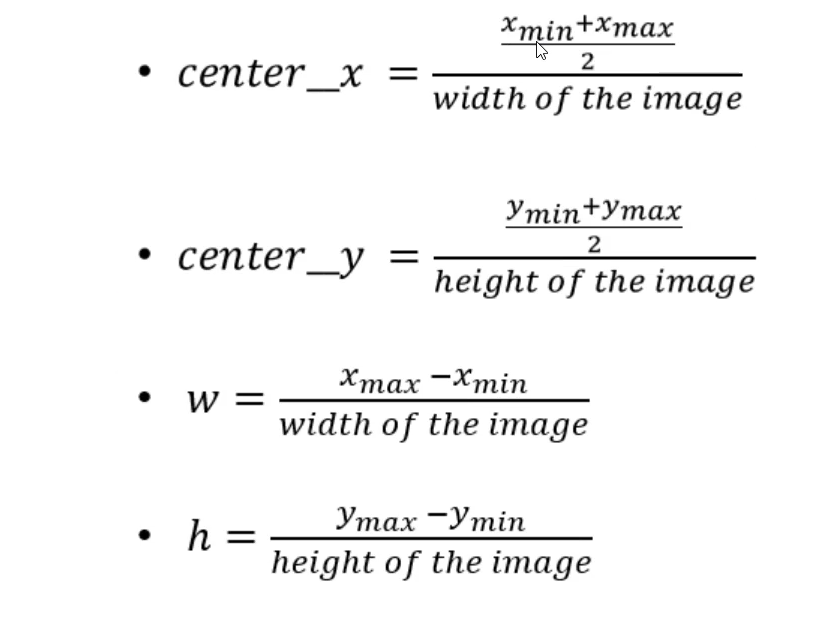

In [62]:
# Type conversions
cols = ['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769 entries, 0 to 4768
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  4769 non-null   object
 1   width     4769 non-null   int64 
 2   height    4769 non-null   int64 
 3   name      4769 non-null   object
 4   xmin      4769 non-null   int64 
 5   xmax      4769 non-null   int64 
 6   ymin      4769 non-null   int64 
 7   ymax      4769 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 298.2+ KB


In [63]:
# Convert the data to apply to YOLO
# Frist center x, center y
df['center_x'] = ((df['xmax']+df['xmin'])/2)/df['width']
df['center_y'] = ((df['ymax']+df['ymin'])/2)/df['height']
# Width
df['w'] = (df['xmax']-df['xmin'])/df['width']
# Height
df['h'] = (df['ymax']-df['ymin'])/df['height']

In [64]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,000296.jpg,500,348,car,427,500,125,181,0.927,0.439655,0.146,0.160920
1,000296.jpg,500,348,boat,44,459,120,222,0.503,0.491379,0.830,0.293103
2,000298.jpg,500,388,person,180,339,32,359,0.519,0.503866,0.318,0.842784
3,000302.jpg,500,375,car,488,500,276,320,0.988,0.794667,0.024,0.117333
4,000302.jpg,500,375,car,475,486,251,273,0.961,0.698667,0.022,0.058667


Split data into train and test